In [7]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials, SpotifyOAuth
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


In [8]:
SPOTIPY_CLIENT_ID='aa3b040fe8a14f47babd5211bc20f4c8'  
SPOTIPY_SECRET_ID='7274e34729fc407d9f0bef405fd24805'
SPOTIPY_REDIRECT_URI='http://localhost:3005/callback/'

In [9]:
scope = "user-library-read, playlist-read-private, user-read-private, user-read-playback-state, user-top-read, user-follow-read, user-read-currently-playing, user-read-recently-played"

auth_manager = SpotifyOAuth(client_id=SPOTIPY_CLIENT_ID, client_secret= SPOTIPY_SECRET_ID, redirect_uri=SPOTIPY_REDIRECT_URI, scope=scope)
sp = spotipy.Spotify(auth_manager=auth_manager)



In [10]:
playlists = sp.current_user_playlists()
while playlists:
    for i, playlist in enumerate(playlists['items']):
        print("%4d %s %s" % (i + 1 + playlists['offset'], playlist['uri'],  playlist['name']))
    if playlists['next']:
        playlists = sp.next(playlists)
    else:
        playlists = None

   1 spotify:playlist:2ijdBcHfEmWXoz2QDn8YHx Groove
   2 spotify:playlist:3e74riRWhnRhgvSGWbrHdm Parties...
   3 spotify:playlist:1b9TmDoNUFe9IzTgAcyDzO Soul


### Exploring Albums

In [11]:
albums = sp.current_user_saved_albums(limit=20)
for album in albums['items']:
    print(album['album']['name'])



Remember Your North Star
Janky Star
Step By Step EP
The Heart Part 5
Classic Objects
Blackstar
Big Time
HYPNOS
Mr. Morale & The Big Steppers
A Light for Attracting Attention
Car Therapy Sessions
Space 1.8
Butterfly
Air
ENTERTAINMENT, DEATH
Untourable Album
5.17
PAINLESS
Dragon New Warm Mountain I Believe In You
Drawing Room


In [37]:
def get_wordcloud(df):
    text = " ".join(i for i in df['artist'].str.replace(' ',''))
    stopwords = list(set(STOPWORDS))
    wordcloud = WordCloud(stopwords=stopwords, background_color="black", colormap='PuBu').generate(text)
    plt.figure( figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

### Exploring Playlists

In [31]:
playlists = sp.current_user_playlists()
pl = playlists['items'][0] #playlist index
playlist_id = pl['id']


In [32]:
def get_playlist_tracks(playlist_id):
    playlist = sp.playlist(playlist_id)
    artists = []
    track_names = []
    track_ids = []
    danceability = []
    energy = []
    key = []
    loudness = []
    mode = []
    speechiness = []
    acousticness = []
    instrumentalness = []
    liveness = []
    valence = []
    tempo = []
    
    for idx, item in enumerate(playlist['tracks']['items']):
        track = item['track']['name']
        id = item['track']['id']
        artist = item['track']['artists'][0]['name']
        
        artists.append(artist)
        track_names.append(track)
        track_ids.append(id)
        features = sp.audio_features(id)[0]
        danceability.append(features['danceability'])
        energy.append(features['energy'])
        key.append(features['key'])
        loudness.append(features['loudness'])
        mode.append(features['mode'])
        speechiness.append(features['speechiness'])
        acousticness.append(features['acousticness'])
        instrumentalness.append(features['instrumentalness'])
        liveness.append(features['liveness'])
        valence.append(features['valence'])
        tempo.append(features['tempo'])

    df = pd.DataFrame(list(zip(track_ids,track_names,artists, 
                        danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness, valence, tempo)), 
                        columns=['id','name','artist', 'danceability','energy','key','loudness','mode','speechiness','acousticness',
                        'instrumentalness','liveness','valence', 'tempo'])
    return df

In [33]:
playlist_df = get_playlist_tracks(playlist_id=playlist_id)

In [34]:
mean_df = playlist_df.mean(axis=0)

C:\Users\emile\AppData\Local\Temp\ipykernel_13580\3469927617.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [35]:
radar_df = mean_df.filter(items=['danceability','energy','speechiness','acoustincess','instrumentalness','liveness','valence','mode',])
fig = px.bar_polar(radar_df, r=radar_df.values, theta=radar_df.index, 
                    range_r = [], color=radar_df.index,
                    color_discrete_sequence=px.colors.qualitative.Plotly,
                    template='plotly_dark')

fig.show()

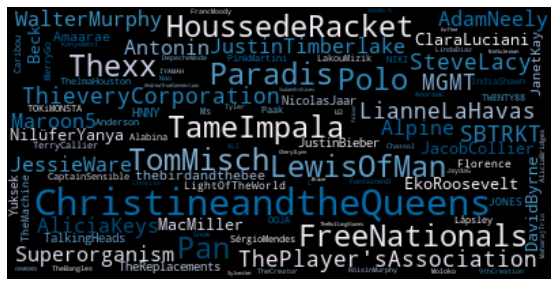

In [38]:
get_wordcloud(playlist_df)

### Exploring Top Tracks

In [17]:
def get_top_tracks():
    top_tracks = sp.current_user_top_tracks(limit=50, time_range='short_term')
    artists = []
    track_names = []
    track_ids = []
    danceability = []
    energy = []
    key = []
    loudness = []
    mode = []
    speechiness = []
    acousticness = []
    instrumentalness = []
    liveness = []
    valence = []
    tempo = []
    
    for idx, item in enumerate(top_tracks['items']):
        track = item['name']
        uri = item['uri']
        artist = item['artists'][0]['name']
        artists.append(artist)
        track_names.append(track)
        track_ids.append(uri)
        features = sp.audio_features(uri)[0]
        danceability.append(features['danceability'])
        energy.append(features['energy'])
        key.append(features['key'])
        loudness.append(features['loudness'])
        mode.append(features['mode'])
        speechiness.append(features['speechiness'])
        acousticness.append(features['acousticness'])
        instrumentalness.append(features['instrumentalness'])
        liveness.append(features['liveness'])
        valence.append(features['valence'])
        tempo.append(features['tempo'])

    df = pd.DataFrame(list(zip(track_ids,track_names,artists, 
                        danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness, valence, tempo)), 
                        columns=['id','name','artist', 'danceability','energy','key','loudness','mode','speechiness','acousticness',
                        'instrumentalness','liveness','valence', 'tempo'])
    return df





In [18]:
top_tracks_df = get_top_tracks()
mean_df = top_tracks_df.mean(axis=0)
top_tracks_df.head(10)



C:\Users\emile\AppData\Local\Temp\ipykernel_13580\3479958638.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,id,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,spotify:track:16yjTWzlK1IVHh3kE61lbJ,Love Me,Braxe + Falcon,0.771,0.726,2,-7.605,0,0.0905,0.009000,0.00494,0.0751,0.5280,107.993
1,spotify:track:2k53CUO1l6n9IdwYerskQ4,reprise,Yaya Bey,0.622,0.427,8,-8.940,1,0.0987,0.620000,0.39100,0.1110,0.6210,80.047
2,spotify:track:6kKXowSTq8uKZhdFPdG9BS,black screen,LCD Soundsystem,0.584,0.433,7,-14.590,1,0.0253,0.321000,0.92300,0.0912,0.0721,100.010
3,spotify:track:144pmLno2ywO6gBAkMjBf7,Tall Tales,Kennebec,0.492,0.776,1,-9.864,1,0.1630,0.339000,0.00207,0.1320,0.7340,90.990
4,spotify:track:2tTVoJ1A4aPrhzuTxDBd7D,Lazy Day,Grace Ives,0.809,0.536,1,-5.647,1,0.0521,0.088200,0.05650,0.0469,0.9260,99.994
5,spotify:track:0nlZjTPzW6S9JIESuGfImT,Lowdown,Boz Scaggs,0.662,0.788,11,-5.544,0,0.0635,0.081200,0.14100,0.0351,0.9290,116.499
6,spotify:track:2v1TDSie6VgdAvXSui0NPY,Sunset - Jamie xx Edit,The xx,0.885,0.397,11,-11.732,0,0.0901,0.011800,0.41200,0.0996,0.5410,120.010
7,spotify:track:3qOuySPLpVyBXLuTNMgbRj,On Hold - Jamie xx Remix,The xx,0.759,0.909,0,-7.850,0,0.0373,0.301000,0.84400,0.0998,0.4710,128.188
8,spotify:track:7jUDKdgTo3kMfGIfeQQEMw,You Make Me Feel (Mighty Real) - Soulwax For D...,Sylvester,0.611,0.939,0,-6.426,1,0.0447,0.000589,0.47700,0.3090,0.7630,125.005
9,spotify:track:3WkibOpDF7cQ5xntM1epyf,It Wasn't Me,Shaggy,0.853,0.606,0,-4.596,1,0.0713,0.056100,0.00000,0.3130,0.6540,94.759


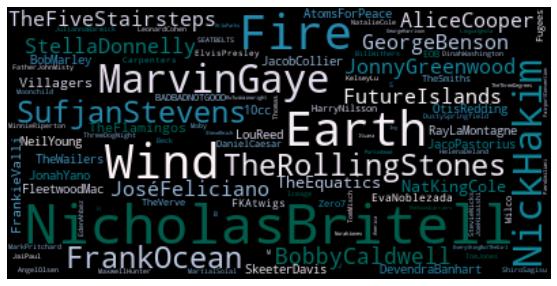

In [30]:
get_wordcloud(top_tracks_df)

In [21]:

radar_df = mean_df.filter(items=['danceability','energy','speechiness','acoustincess','instrumentalness','liveness','valence','mode',])
fig = px.bar_polar(radar_df, r=radar_df.values, theta=radar_df.index, 
                    range_r = [], color=radar_df.index,
                    color_discrete_sequence=px.colors.qualitative.Plotly,
                    template='plotly_dark')

fig.show()

In [22]:
X = np.array(top_tracks_df.drop(['id','name','artist'], axis=1))

In [23]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
df = pd.DataFrame(zip(range(1,11),wcss),columns=['# of Clusters','WCSS'])
fig = px.line(df, x='# of Clusters',y='WCSS', title='Elbow Method',template='plotly_dark')
fig.show()

In [24]:
kmeans = KMeans(n_clusters=4, random_state=42)
top_tracks_df['cluster'] = kmeans.fit_predict(X)
X_proj = TSNE(n_components=2, learning_rate='auto',
                  init='random', random_state=42).fit_transform(X)

top_tracks_df['X'] = [item[0] for item in X_proj]
top_tracks_df['Y'] = [item[1] for item in X_proj]



In [25]:
top_tracks_df['cluster_str'] = top_tracks_df['cluster'].astype(str)
top_tracks_df['track_str'] = top_tracks_df['name'] + " - " + top_tracks_df['artist']

size = 'danceability'
hover_dict = {'X':False,'Y':False,'cluster':False,size:False, 'cluster_str':False}

fig = px.scatter(top_tracks_df,x='X',y='Y',color='cluster_str',size=size, template='plotly_dark', hover_name="track_str", hover_data=hover_dict,
                color_discrete_sequence=px.colors.qualitative.Plotly)
#legend
fig.update_layout(showlegend=False)
#x axis
fig.update_xaxes(visible=False)

#y axis    
fig.update_yaxes(visible=False)
fig.show()

{'href': 'https://api.spotify.com/v1/playlists/2ijdBcHfEmWXoz2QDn8YHx/tracks',
 'total': 104}